In [54]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from adjustText import adjust_text
from scipy import stats
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [61]:
pop_df=pd.read_csv(r'C:\Users\Yasaman\Downloads\World_bank_population.csv',skiprows=3)
pop_df=pop_df[['Country Code','2003','2018']].dropna()
pop_df['2018']=pop_df['2018'].astype(int)
possible_countries=pop_df.query(" `2018` >=1000000")['Country Code'].values
possible_countries=[x.lower() for x in possible_countries]

In [57]:
len(possible_countries)

198

In [62]:

df=pd.read_csv(r"C:\Users\Yasaman\Downloads\Attention-fractional counting.csv")
df=df.rename(columns={'year':'Year', 'aggregated_value':'count', 'country':'Mention_country', 'affiliation_country':'Aff_country'})
Country_list={'Egypt':'EGY', 'Tunisia':'TUN','Libya':'LBY','Syria':'SYR','Yemen':'YEM','Bahrain':'BHR','Jordan':'JOR','Kuwait':'KWT','Morocco':'MAR','Oman':'OMN'}
rev_Country_list={Country_list[key]: key for key in Country_list}
abbr=[country.lower() for country in Country_list.values()]
country_codes=pd.read_csv(r"C:\Users\Yasaman\Downloads\iso3.csv")
country_codes['iso3']=[c.lower() for c in country_codes['iso3']]
physical_sciences=[ 'MATH', 'ENGI', 'PHYS', 'COMP', "MUL"]
df=df[~df['subjarea'].isin(physical_sciences)]
map={country_codes.iloc[c]['iso3']: country_codes.iloc[c]['name'] for c in range(len(country_codes))}
map['irn']='Iran'
map['usa']='USA'
map['gbr']='UK'
filtered_df=df[(df['Mention_country'].isin(abbr))&(df['Mention_country']!=df['Aff_country'])]

before_df=filtered_df[filtered_df['Year'].isin(np.arange(2002, 2011, 1))].groupby(by=['Mention_country','Aff_country']).sum().reset_index()[['count','Mention_country','Aff_country']].rename(columns={'count':'count_before'})
after_df=filtered_df[filtered_df['Year'].isin(np.arange(2011, 2020, 1))].groupby(by=['Mention_country','Aff_country']).sum().reset_index()[['count','Mention_country','Aff_country']].rename(columns={'count':'count_after'})
compare_df=before_df.merge(after_df, how='outer', on=['Mention_country','Aff_country']).fillna(0)
compare_df['count_after']/=9
compare_df['count_before']/=9
compare_df=compare_df.groupby(['Aff_country'])[['count_before', 'count_after']].sum().reset_index()
compare_df['difference']=compare_df['count_after']-compare_df['count_before']
compare_df=compare_df.sort_values('difference', ascending=False)



In [63]:
compare_df

,Aff_country,count_before,count_after,difference
183,usa,176.459208,348.711034,172.251826
60,gbr,105.086365,223.389769,118.303404
154,sau,14.168352,89.274370,75.106018
57,fra,123.335550,195.661460,72.325910
51,esp,42.306783,109.231428,66.924645
...,...,...,...,...
37,cpv,0.157407,0.008547,-0.148860
7,arm,0.333990,0.174783,-0.159207
185,ven,0.285774,0.099628,-0.186146
93,kgz,0.189153,0.001800,-0.187354


In [64]:
country_df=pd.read_csv(r"C:\Users\Yasaman\Downloads\World_bank_GDP_per_capita.csv",skiprows=4)


In [65]:
columns =[country_df.columns[1]]+list(np.arange(2002, 2020, 1).astype(str))   # Convert year numbers to strings if columns are named as strings
selected_df = country_df[columns]  # Select the columns
# Generate the list of column names
average_columns = np.arange(2002, 2020, 1).astype(str)

# Calculate the row-wise average, ignoring NaN values
selected_df['average_gdp_pc'] = selected_df[average_columns].mean(axis=1, skipna=True)



selected_df=selected_df[[country_df.columns[1],'average_gdp_pc']]
selected_df['Country Code']=selected_df['Country Code'].apply(lambda x:x.lower())



country_df=selected_df.merge(compare_df, left_on='Country Code', right_on='Aff_country', how='left').dropna(subset=['Aff_country'])
country_df=country_df[country_df['Aff_country'].isin(possible_countries)]


country_codes=pd.read_csv(r"C:\Users\Yasaman\Downloads\iso3.csv")
country_codes['iso3']=[c.lower() for c in country_codes['iso3']]
map={country_codes.iloc[c]['iso3']: country_codes.iloc[c]['name'] for c in range(len(country_codes))}
map['irn']='Iran'
map['usa']='USA'
map['gbr']='UK'
map['rus']='Russia'
map['syr']='Syria'
map['are']='UAE'
plot_a_df=country_df.reset_index(drop=True)

C:\Users\Yasaman\AppData\Local\Temp\ipykernel_19272\1490436947.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['average_gdp_pc'] = selected_df[average_columns].mean(axis=1, skipna=True)


aus
che
deu
dnk
esp
fra
gbr
irl
irn
ita
mys
nor
qat
sau
swe
usa
Pearson Correlation Coefficient: 0.42239579666655147
P-value: 5.942465263718134e-08
Spearman Correlation Coefficient: 0.6047095729194432
P-value: 1.5858244365628935e-16


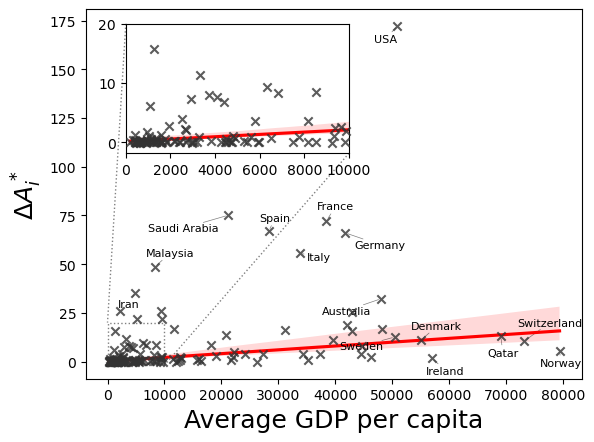

In [70]:
fig, ax1=plt.subplots(nrows=1, ncols=1)
ins = ax1.inset_axes([0.08,0.61,0.45,0.35])


sns.regplot(plot_a_df, x='average_gdp_pc', y='difference' ,marker="x", color=".2", line_kws=dict(color="r"),ax=ax1,  scatter_kws={"zorder":10}, robust=True)
ax1.set_ylabel(r'$\Delta A_i^*$', fontsize=18)
ax1.set_xlabel('Average GDP per capita', fontsize=18)


sns.regplot(plot_a_df, x='average_gdp_pc', y='difference' ,marker="x", color=".2", line_kws=dict(color="r"),ax=ins,  scatter_kws={"zorder":10}, robust=True)
ins.set_ylabel(r'', fontsize=10)
ins.set_xlabel(r'', fontsize=10)
ins.set_xlim(0, 10000)
ins.set_ylim(-15/8, 20)


points=[]
# Annotate each point
for line in plot_a_df[(plot_a_df['difference']>30)|(plot_a_df['average_gdp_pc']>50000)].index:

    x = plot_a_df.average_gdp_pc[line]
    y = plot_a_df.difference[line]
    label =map[plot_a_df.Aff_country[line]]
    print(plot_a_df.Aff_country[line])
    points+=[ax1.text(x, y, label,
                    fontsize=8, ha='center', va='center')]

adjust_text(points, arrowprops=dict(arrowstyle="-", color='k', lw=0.5, alpha=.5), expand=(1.5, 2.5))        




correlation_coefficient, p_value = pearsonr(plot_a_df['difference'], plot_a_df['average_gdp_pc'])
print("Pearson Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

correlation_coefficient, p_value = stats.spearmanr(plot_a_df['difference'], plot_a_df['average_gdp_pc'])
print("Spearman Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

mark_inset(ax1, ins, loc1=2, loc2=4, fc="none", ec="0.5", linestyle=':')

fig.savefig('attention_vs_gdp.pdf', bbox_inches='tight')

In [69]:
plot_a_df=plot_a_df.dropna()